In [3]:
import numpy as np
import math
import os
from scipy.spatial import  distance
import matplotlib
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
%matplotlib inline
# from pandas.tools.plotting import scatter_plot
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

In [5]:
### Read data file

fi = open("Face1.txt", "rt")
l = fi.readline()[:-1]
N = int(l)
l = fi.readline()[:-1]
K = int(l)
# F is list of person name
F = ["" for i in range(N)]
# P is list of pose of face
P = ["" for i in range(N)]
#X is emb matrix of all images
X = np.zeros((N, K))
links=[]
for i in range(N):
    F[i] = fi.readline()[:-1]
    P[i] = fi.readline()[:-1]
#    line is link of image
    line = fi.readline()
    links.append(line)
    temp = np.fromstring(fi.readline()[:-1], dtype=float, sep=' ')
    #print(i,"..",F[i])
    for j in range(K):
        X[i][j] = temp[j]
fi.close()

In [3]:
def dist_L2(X, Y):
    # Compute L2 Distance matrix, between matrix X of size Nx P with matrix Y of size MxP
    # and return NxM matrix distance
    M= np.shape(X)[0]
    N= np.shape(Y)[0]
    Dist= np.zeros((M, N))
    for i in range(0,M):
        for j in range(0,N):
            Dist[i,j]=distance.euclidean(X[i],Y[j])
            
    return Dist

In [7]:
F

['TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TonLH',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'TucNV',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DungVQ',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',
 'DucLH',


In [6]:
X

array([[-0.148309  ,  0.0830491 ,  0.0488362 , ...,  0.022142  ,
         0.0499281 ,  0.0389486 ],
       [-0.102729  ,  0.0963553 ,  0.0111765 , ..., -0.0146511 ,
         0.075693  ,  0.0351896 ],
       [-0.125987  ,  0.0723958 ,  0.0191209 , ...,  0.00510832,
         0.0687682 ,  0.0684439 ],
       ...,
       [-0.202038  ,  0.130155  ,  0.0197721 , ...,  0.00381656,
         0.109111  ,  0.057653  ],
       [-0.16707   ,  0.143691  ,  0.0512868 , ...,  0.0269642 ,
         0.130632  ,  0.0994892 ],
       [-0.133108  ,  0.128499  ,  0.0784712 , ...,  0.0130199 ,
         0.0825614 ,  0.0803591 ]])

In [4]:

def get_colors(target_ids):
	x = np.arange(len(target_ids))
	ys = [i+x+(i*x)**2 for i in range(len(target_ids))]
	return cm.rainbow(np.linspace(0, 1, len(ys)))

In [10]:
### To visualize the data point based on NameID
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
N= np.shape(X)[0]

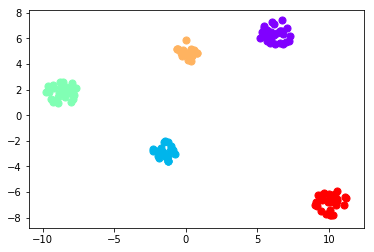

In [11]:
target_ids = list(set(F))
colors = get_colors(target_ids)
for i in range (len(target_ids)):
    indexes = [z for z in range(N) if F[z] == target_ids[i]]
    plt.scatter(X_2d[indexes, 0], X_2d[indexes, 1], s=50, color=colors[i])

In [12]:
###Performance K-means:

In [13]:
Number_centers=5


In [14]:
###Initial center_point:
### METHOD 1:
arr= np.arange(N)
np.random.shuffle(arr)
Center_vectors= X[arr[0:Number_centers]] # 5x128

In [32]:
# Calculate distance between 2 matrix:
Distance_data2Center = dist_L2(X,Center_vectors)
Distance_data2Center

array([[0.52816625, 0.2324853 , 0.54597032, 0.43585524, 0.47496143],
       [0.50296279, 0.23541788, 0.57169617, 0.51818344, 0.5072337 ],
       [0.5380469 , 0.20160521, 0.59166522, 0.48613657, 0.50924139],
       [0.53785082, 0.2169932 , 0.56326718, 0.4623881 , 0.51559173],
       [0.52908843, 0.19792411, 0.5446459 , 0.45260362, 0.50777721],
       [0.52283301, 0.17053363, 0.56091468, 0.4374652 , 0.50840632],
       [0.55328488, 0.2027298 , 0.58599241, 0.48744815, 0.55686127],
       [0.55909112, 0.2134491 , 0.5731369 , 0.47484256, 0.53624581],
       [0.60969397, 0.32867646, 0.6334936 , 0.54197805, 0.62929955],
       [0.513612  , 0.23787229, 0.60607788, 0.50984392, 0.5260673 ],
       [0.53235893, 0.20522413, 0.55158844, 0.48171013, 0.50464836],
       [0.4963777 , 0.26942602, 0.56143535, 0.49098686, 0.50278271],
       [0.55217318, 0.20081246, 0.56393647, 0.46286496, 0.52582538],
       [0.54297689, 0.26440486, 0.6394943 , 0.53104543, 0.5721046 ],
       [0.54203693, 0.22635889, 0.

In [16]:
#Find min_index of each row in the distance matrix. 
#Min_index[i] is Cluster_ID which row_vector X[i] should be assigned in.
Min_index = np.argmin(Distance_data2Center, axis=1)

In [17]:
Min_index

array([1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 4, 1, 1, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       4], dtype=int64)

In [18]:
###To visualize the first iteration cluster data:


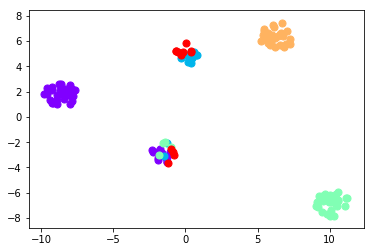

In [19]:
target_ids = list(set(Min_index))
colors = get_colors(target_ids)
for i in range (len(target_ids)):
    indexes = [z for z in range(N) if Min_index[z] == target_ids[i]]
    plt.scatter(X_2d[indexes, 0], X_2d[indexes, 1], s=50, color=colors[i])
    

In [20]:
# Update new center by average all points in each cluster
for center_id in range(0,Number_centers): 
    Temp_cluster = X[Min_index==center_id]
    Center_vectors[center_id] = np.average(Temp_cluster, axis=0)

In [21]:
#### Run K_means 100 times:
for iter in range(0,100):
    # Calculate distance between 2 matrix:
    Distance_data2Center = dist_L2(X,Center_vectors)
#Find min_index of each row in the distance matrix. 
#Min_index[i] is Cluster_ID which row_vector X[i] should be assigned in.
    Min_index = np.argmin(Distance_data2Center, axis=1)
 # Update new center by average all points in each cluster   
    for center_id in range(0,Number_centers): 
        
        Temp_cluster = X[Min_index==center_id]
        Center_vectors[center_id] = np.average(Temp_cluster, axis=0)
    

In [33]:
Min_index
Center_vectors

array([[-6.67584667e-02,  1.38792933e-01,  1.79724749e-02,
        -7.02432300e-02, -1.11863543e-01, -7.94283833e-02,
        -6.47343667e-02, -1.80010367e-01,  9.46348867e-02,
        -9.32539933e-02,  2.73913333e-01, -2.84532917e-02,
        -2.21287800e-01, -2.09991767e-01, -4.15563433e-03,
         1.61276333e-01, -1.62642433e-01, -1.87980967e-01,
        -5.14071067e-02, -4.60945400e-02,  7.94509367e-02,
         1.49924867e-02,  9.72366600e-02,  1.08628489e-02,
        -1.10396950e-01, -3.62481500e-01, -1.02705123e-01,
        -8.09688400e-02,  1.50996087e-02, -3.26523973e-02,
        -4.27200502e-02,  1.95771693e-02, -1.86336600e-01,
        -1.02359183e-01,  6.53660267e-02,  9.56976700e-02,
        -5.25621200e-02, -9.62681100e-02,  2.01064000e-01,
        -2.15501583e-03, -1.88791333e-01, -2.56858585e-02,
         4.40267377e-02,  2.78055533e-01,  1.94912967e-01,
        -1.38115477e-02,  4.41092880e-02, -1.20016433e-01,
         1.24667317e-01, -1.45702667e-01,  9.17764200e-0

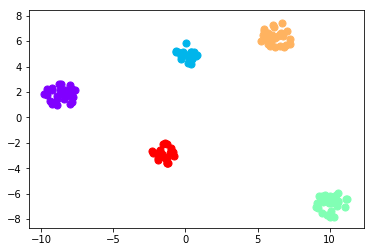

In [23]:
###Show final result:

target_ids = list(set(Min_index))
colors = get_colors(target_ids)
for i in range (len(target_ids)):
    indexes = [z for z in range(N) if Min_index[z] == target_ids[i]]
    plt.scatter(X_2d[indexes, 0], X_2d[indexes, 1], s=50, color=colors[i])


In [24]:
###Compare with K_means in skitlearn Toolbox:

In [25]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [26]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [34]:
kmeans.cluster_centers_

array([[-8.36539630e-02,  1.79468100e-01,  1.00877960e-01,
         1.04894225e-02, -5.47616900e-02, -3.13142023e-02,
        -9.70573800e-02, -1.00225320e-01,  8.30545867e-02,
        -2.31027017e-02,  2.40540567e-01, -5.57753033e-02,
        -1.68349633e-01, -1.05452413e-01, -2.31982717e-02,
         1.86865467e-01, -1.90743600e-01, -1.20703270e-01,
        -6.51557200e-02, -1.93066020e-02,  5.00831800e-02,
         1.16490803e-02,  4.26072371e-02, -1.50551537e-02,
        -4.50050167e-02, -3.92611400e-01, -6.47953767e-02,
        -1.00035473e-01,  1.51387133e-01, -1.08029813e-02,
        -1.42094750e-01,  9.09924140e-03, -1.93232967e-01,
        -1.25150733e-01,  9.22358100e-02,  1.03614040e-01,
        -4.44660933e-02, -2.17062963e-02,  1.90321433e-01,
        -3.94438597e-02, -1.54161467e-01,  7.38403567e-02,
         7.04149300e-02,  2.34140567e-01,  2.40593767e-01,
         1.13755470e-01,  7.24626667e-02, -1.44057070e-01,
         1.05883337e-01, -1.49562300e-01,  5.27475033e-0

In [27]:
Min_index

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4], dtype=int64)

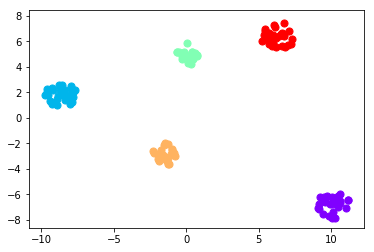

In [28]:
for i in range (len(target_ids)):
    indexes = [z for z in range(N) if kmeans.labels_[z] == target_ids[i]]
    plt.scatter(X_2d[indexes, 0], X_2d[indexes, 1], s=50, color=colors[i])